# TALLER-1-MINE-4101

Daniel Felipe Vargas Ulloa - 232123899


**Contexto de negocio:** Inversiones inmobiliarias para alquiler vacacional.
Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. Con la creciente popularidad de este modelo de negocio, es cada
vez más difícil tomar buenas decisiones respecto a los mejores sectores de la ciudad, tipos
de propiedad, entre otros factores, para lograr una rentabilidad adecuada a lo largo del
tiempo. Una vez que la propiedad se encuentra listada en la plataforma, asegurar una alta
tasa de ocupación estableciendo un precio por noche justo y un buen sistema de atención
a los usuarios es vital para el éxito del negocio.

## **1. Preparación**

### **1.1. Importar librerias**

In [1]:
!pip install squarify

# Importar librerías
import scipy.stats as stats
import squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
# Configuración de pandas para extender el número de filas y columnas mostradas
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 200)
pd.set_option("display.max_rows", 100)
np.set_printoptions(threshold=np.inf)

### **1.2. Importar datos**

In [3]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

## **2. Entendimiento inicial de datos**

### **2.1 Analisis general del dataset**


En el análisis general, observaremos las dimensiones del dataset para entender cuántos registros y atributos estamos manejando. También revisaremos el tipo de datos de cada columna, lo que nos permitirá verificar si hay algún dato que deba ser transformado para análisis posteriores.

In [4]:
# Mostrar las dimensiones del dataset
print(f"Dimensiones del dataset: {listings_df.shape}")

Dimensiones del dataset: (5780, 75)


In [5]:
# Mostrar los primeros registros del dataset
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20240913130419,2024-09-13,city scrape,Georgian Boutique Apt City Centre,"Stunning, spacious ground floor apartment minutes from Princes Street. Your own ‘home from home’ in an historic property, we strive to offer you the highest standards of comfort and attention to ...","The neighbourhood is in the historic New Town, renowned for its Georgian architecture and a World Heritage Site. Whilst it is a 5 minute walk to Princes Street, it has its own distinctive atmosph...",https://a0.muscache.com/pictures/cf69631f-4194-4020-ae63-9d745a90ec74.jpg,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, United Kingdom","I have a background in property, having worked as an interior designer and on a number of renovations. I have lived in Edinburgh for over 30 years and am passionate about the city.",within a few hours,100%,93%,t,https://a0.muscache.com/im/users/60423/profile_pic/1326194735/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/60423/profile_pic/1326194735/original.jpg?aki_policy=profile_x_medium,NaN,3,6,"['email', 'phone']",t,t,Neighborhood highlights,"Old Town, Princes Street and Leith Street",NaN,55.957590,-3.188050,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Hair dryer"", ""Garden view"", ""Luggage dropoff allowed"", ""Books and reading material"", ""Dishwasher"", ""Shampoo"", ""Bathtub"", ""Drying rack for clothing"", ""Dishes and silverware"", ""Board ...",$145.00,3,30,2,3,30,30,3.0,30.0,NaN,t,2,4,7,181,2024-09-13,580,69,8,2011-01-18,2024-09-10,4.98,4.99,4.97,4.98,4.99,4.98,4.92,NaN,f,1,1,0,0,3.49
1,24288,https://www.airbnb.com/rooms/24288,20240913130419,2024-09-13,city scrape,"Cool central Loft, sleeps 4, 2 double bed+en-suite","Upper level of duplex. Boho rustic-chic former warehouse Loft located in lively University quarter of City centre for exploring historic Old Town and at heart of Fringe, Jazz and International Fes...","Boho, studenty, lively, cool neighbourhood",https://a0.muscache.com/pictures/3460007/887314c6_original.jpg,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, United Kingdom",Principal\nStudio DuB\nArchitecture & Planning industry\n2006 – Present,within an hour,100%,100%,t,https://a0.muscache.com/im/users/46498/profile_pic/1259125328/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/46498/profile_pic/1259125328/original.jpg?aki_policy=profile_x_medium,Southside,1,1,"['email', 'phone']",t,t,Neighborhood highlights,"Canongate, Southside and Dumbiedykes",NaN,55.944983,-3.185293,Entire loft,Entire home/apt,4,1.5,1.5 baths,2.0,2.0,"[""Hot w

In [6]:
print("\nTipos de datos por columna:")
print(listings_df.dtypes)


Tipos de datos por columna:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rat

### **2.2. Analsis Univariado**

A partir de nuestro entendimiento del negocio, sabemos que la rentabilidad de una propiedad en alquiler vacacional está influenciada por varios factores clave, como la ubicación, el precio, el tipo de propiedad, la capacidad de alojamiento y la disponibilidad. Estos atributos nos ayudarán a determinar las tendencias del mercado y las oportunidades de inversión para los usuarios interesados en la plataforma AirBnb.

In [7]:
#Columnas en las que nos enfocaremos para el analisis univariado
important_columns = ['neighbourhood_cleansed', 'price', 'room_type', 'accommodates', 'availability_365']

#### **2.1.1. Análisis del atributo "neighbourhood_cleansed"**

La ubicación de una propiedad es uno de los factores más importantes en cualquier inversión inmobiliaria. A través de este análisis, revisaremos la distribución de propiedades en las diferentes zonas de la ciudad, lo que nos permitirá identificar las áreas con mayor oferta.

In [8]:
print("\nDistribución de vecindarios:")
print(listings_df['neighbourhood_cleansed'].value_counts().head())


Distribución de vecindarios:
neighbourhood_cleansed
Old Town, Princes Street and Leith Street    716
Deans Village                                341
Tollcross                                    283
New Town West                                227
Hillside and Calton Hill                     194
Name: count, dtype: int64


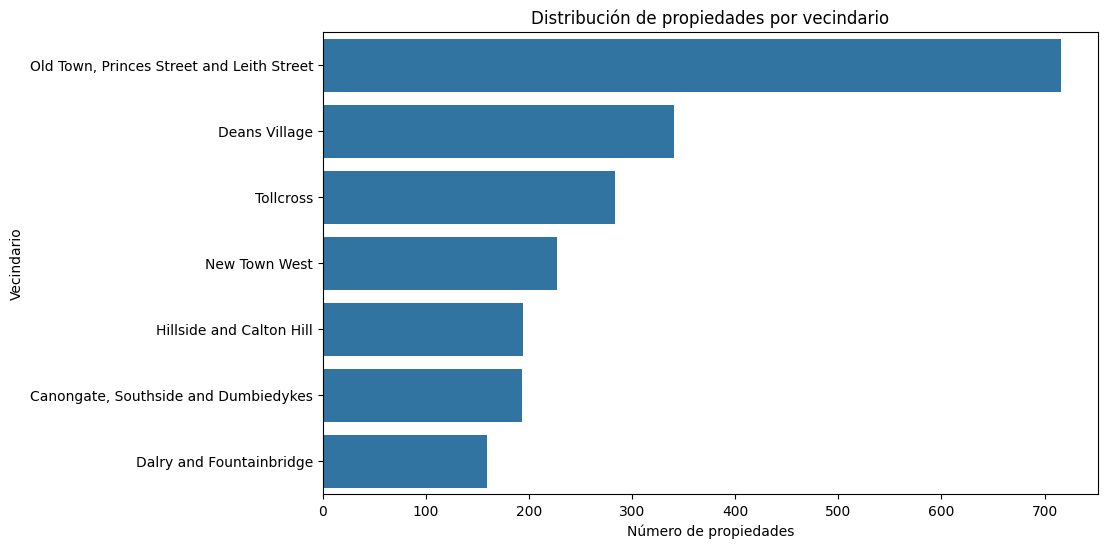

In [9]:
# Gráfico de distribución de vecindarios, 7 vecindarios con mas propiedades
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood_cleansed', data=listings_df, order=listings_df['neighbourhood_cleansed'].value_counts().iloc[:7].index)
plt.title("Distribución de propiedades por vecindario")
plt.xlabel("Número de propiedades")
plt.ylabel("Vecindario")
plt.show()

El vecindario con mayor número de propiedades listadas en AirBnb es Old Town, Princes Street and Leith Street. Esto tiene sentido, ya que es uno de los vecindarios más grandes y está ubicado en el centro de Edimburgo, una ciudad histórica y culturalmente rica.

![img](https://www.gpsmycity.com/img/wts/520_reg_map.jpg)
*Where To Stay in Edinburgh - Guide of Best Areas - GPSmyCity. (s. f.). https://www.gpsmycity.com/where-to-stay/edinburgh-520.html*

Además, este vecindario es conocido por ser una zona turística clave, con una gran concentración de atracciones, restaurantes y entretenimiento, como podemos ver en este mapa tusitico de Edimburgo. Este tipo de correlaciones entre la localización y el volumen de propiedades será crucial al momento de generar resultados más adelante en la sección de análisis de datos.

#### **2.1.2. Análisis del atributo "price"**

El precio por noche es fundamental para determinar la rentabilidad de una propiedad. Vamos a analizar su distribución y visualizar los outliers usando boxplots. También calcularemos estadísticas clave como la moda, media y mediana.

In [10]:
# Convertir los precios a valores numéricos eliminando caracteres como el "$" y las comas
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [11]:
print("\nEstadísticas básicas del precio:")
print(listings_df["price_float"].describe())


Estadísticas básicas del precio:
count     4873.000000
mean       248.923866
std        593.729527
min         18.000000
25%        106.000000
50%        164.000000
75%        243.000000
max      10000.000000
Name: price_float, dtype: float64


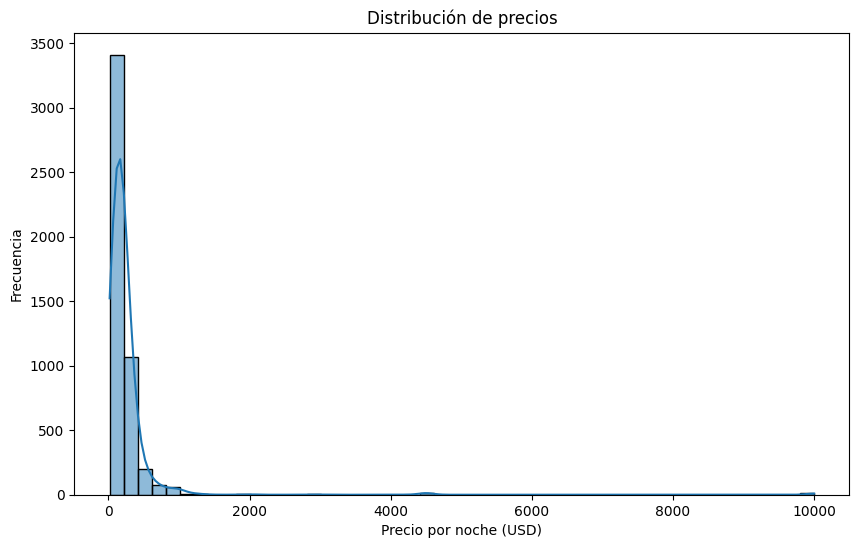

In [12]:
# Histograma de distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(listings_df["price_float"], bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio por noche (USD)")
plt.ylabel("Frecuencia")
plt.show()

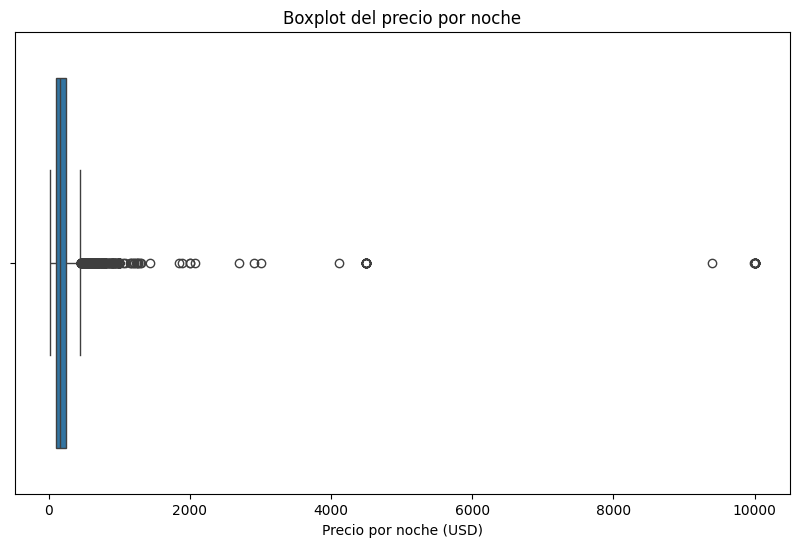

In [13]:
# Boxplot para detectar outliers en los precios
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_float', data=listings_df)
plt.title("Boxplot del precio por noche")
plt.xlabel("Precio por noche (USD)")
plt.show()


In [14]:
# Análisis de outliers en precios
q1 = listings_df['price_float'].quantile(0.25)
q3 = listings_df['price_float'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = listings_df[(listings_df['price_float'] < lower_bound) | (listings_df['price_float'] > upper_bound)]
print(f"Outliers detectados en precios: {len(outliers)} propiedades")

Outliers detectados en precios: 359 propiedades


In [15]:
print("\nModa del precio:", listings_df['price'].mode()[0])


Moda del precio: $150.00


Si bien la mayoría de los alojamientos parecen tener un precio promedio entre 100 y 200 USD por noche, también se identificaron alojamientos que llegan a los 10,000 USD por noche. Es probable que estos alojamientos sean opciones extremadamente lujosas o que estén diseñadas para albergar a un gran número de personas. Vamos a verificar uno de estos alojamientos en detalle.

In [16]:
# Filtrar los alojamientos con precio de 10,000 USD
luxury_property = listings_df[listings_df['price_float'] >= 8000]
luxury_property[['name', 'neighbourhood_cleansed', 'price', 'host_name', 'listing_url']]

,name,neighbourhood_cleansed,price,host_name,listing_url
1680,Coach House,"Ratho, Ingliston and Gogar","$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/30811665
1682,The Hayloft,Balerno and Bonnington Village,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/30873108
1683,Cobble Cottage,Cramond,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/30884560
2186,"One single room near napier, heriot watt, airport",The Calders,"$9,989.00",Wenxing,https://www.airbnb.com/rooms/40758181
2371,Forth Reflections,Queensferry East,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/45714307
2438,Sophisticated Studio For 2 w/ Edin Castle Views,Tollcross,"$9,391.00",Rentir,https://www.airbnb.com/rooms/48951166
2916,Inchkeith View,Trinity,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/574830447521297993
3123,The Forrest Road Residence,"Old Town, Princes Street and Leith Street","$9,999.00",Reserve,https://www.airbnb.com/rooms/642372781301046792
3650,Baileyfield Cottage,Portobello,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/727763395613978330
3759,Quay Cottage,Cramond,"$9,999.00","Cottages,Com",https://www.airbnb.com/rooms/769014254727791091


Al revisar el detalle de una de estas propiedades, encontramos que algunas de estas se tratan de edificaciones antiguas y castillos medievales clásico en Edimburgo, una experiencia invaluable para un grupo grande. Alquilar un castillo completo o parte de este claramente implica un costo muy elevado. Aunque este tipo de propiedades presenta un escenario único para analizar, es evidente que estamos ante datos anómalos, y será necesario definir si estos outliers deben ser incluidos o tratados de forma diferenciada en el análisis final.

A continuación podemos encontrar la publicación de uno de estos alojamientos (alojamiento con id #2276 - 16 Bed Mixed Dorm Edinburgh Centre) : https://www.airbnb.com/rooms/42595134

#### **2.1.3. Análisis del atributo "room_type"**

El tipo de propiedad influye directamente en las preferencias de los usuarios y en la capacidad de generar ingresos. Revisaremos la distribución de los tipos de propiedades.

In [17]:
print("\nDistribución de tipos de propiedad:")
print(listings_df['room_type'].value_counts())


Distribución de tipos de propiedad:
room_type
Entire home/apt    4014
Private room       1723
Shared room          27
Hotel room           16
Name: count, dtype: int64


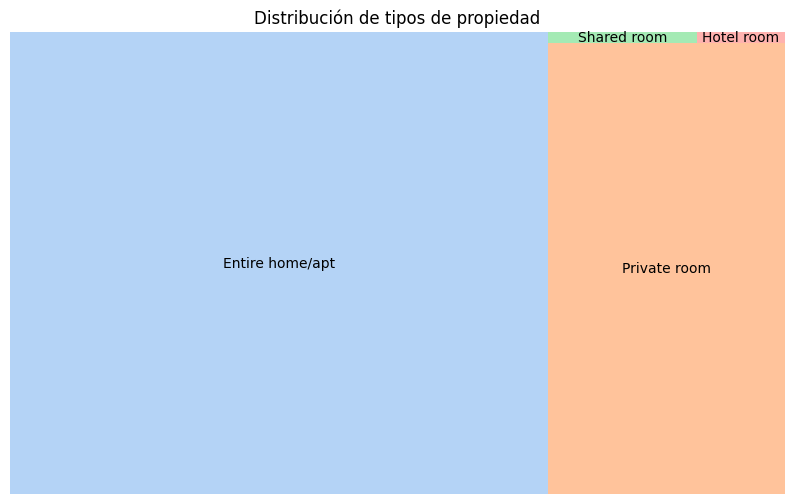

In [18]:
# Preparar los datos para el treemap
room_type_counts = listings_df['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values

# Crear el treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=sns.color_palette("pastel"))
plt.title("Distribución de tipos de propiedad")
plt.axis('off')
plt.show()

El tipo de propiedad más común es un apartamento o casa completa, seguido de cerca por las habitaciones privadas, las cuales conforman la mayor parte del mercado de AirBnb en Edimburgo. Los alojamientos de tipo habitación compartida y habitaciones de hotel son mucho menos frecuentes, representando una porción realmente pequeña del mercado. Esto sugiere que la mayoría de los turistas prefieren tener acceso a un espacio completamente privado durante su estadía.

#### **2.1.4. Análisis del atributo "accommodates"**

La capacidad de alojamiento indica cuántas personas pueden hospedarse en la propiedad, lo que afecta tanto la demanda como el precio. En este análisis, veremos las estadísticas sobre la capacidad de alojamiento.

In [19]:
print("\nEstadísticas básicas sobre la capacidad de alojamiento:")
print(listings_df['accommodates'].describe())


Estadísticas básicas sobre la capacidad de alojamiento:
count    5780.000000
mean        3.540830
std         2.152009
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64


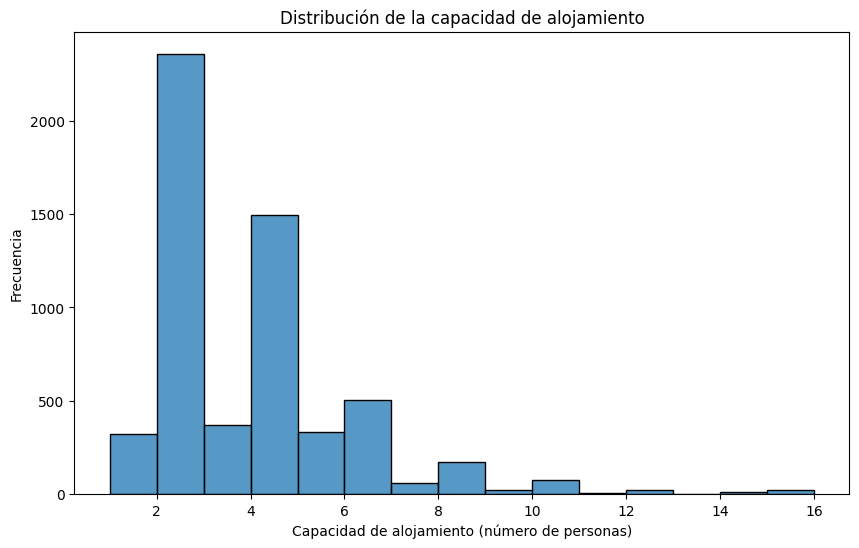

In [20]:
# Histograma de la capacidad de alojamiento
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['accommodates'], bins=15, kde=False)
plt.title("Distribución de la capacidad de alojamiento")
plt.xlabel("Capacidad de alojamiento (número de personas)")
plt.ylabel("Frecuencia")
plt.show()


La capacidad de alojamiento más comúnmente observada es de 3 a 5 personas, lo cual resulta lógico, ya que este tamaño es ideal para familias que visitan una ciudad turística e histórica como Edimburgo. Sin embargo, también existen propiedades con capacidad para alojar hasta 16 personas. Al investigar más a fondo, encontramos que estas propiedades suelen ser castillos o grandes mansiones destinadas a grupos grandes.

In [21]:
# Filtrar los alojamientos con capacidad para 16 personas
large_capacity_properties = listings_df[listings_df['accommodates'] == 16]
large_capacity_properties[['name', 'neighbourhood_cleansed', 'room_type', 'description']]

,name,neighbourhood_cleansed,room_type,description
44,"Stylish Central, Six Bed TownHouse +fast wifi",Deans Village,Entire home/apt,"This grand central Town House will make your visit to Edinburgh special! <br />Built in the 1860s, our soaring Victorian mansion is ideal for a relaxing stay being a very large, elegant and histor..."
56,Royal Mile 4 Bedroom 4 bathroom Apartment,"Old Town, Princes Street and Leith Street",Entire home/apt,"4 bedroom 4 bathroom apartment, on the Royal Mile and a few minutes from the Castle <br />Located and close to all attractions, restaurants and bars on Edinburgh's famous Old Town has to offer. T..."
121,"Elegant, Central, Six Bed Townhouse fast Wifi",Deans Village,Entire home/apt,Large private house. <br /><br />Walk to the centre of Edinburgh from the House within 6 minutes. <br /><br />Close to Haymarket train Station.<br /><br />Table football in large living room. <br ...
344,Multiple apartments Close to each other Old Town,"Old Town, Princes Street and Leith Street",Entire home/apt,"--St Marys street apartment with 3 bedrooms, multiple beds.<br />--St Johns hill apartment with 3 bedrooms, multiple beds. <br />The above two apartments are close to each other . <br />--West Ne..."
773,Central Morrison St Apartment sleeps 16 guests,Tollcross,Entire home/apt,"The Apartment is a 5 minute walk from princess street, the castle & the grassmarket. lots of pubs, restaurants and food shops only 1 minute away. there is even a cinema across the road if you are ..."
1420,"Drylaw House, Grade A Listed Mansion near City Centre",Drylaw,Entire home/apt,Gather for conversations by a fireplace in a room of grand proportions. Original character is preserved in the charming architectural details throughout this majestic mansion. Play billiards in a ...
1796,Central Lothian Rd Apartment sleeps 16 guests,Tollcross,Entire home/apt,"This newly renovated apartment is in the heart of edinburgh. Less than a 10 minute walk to the castle, haymarket train station, princess street and the grass market this place is ideal for large g..."
2276,16 Bed Mixed Dorm Edinburgh Centre,"Old Town, Princes Street and Leith Street",Shared room,"PLEASE NOTE: We are an 18+ hostel.<br /><br />Welcome to Castle Rock! We have lots of room for you to relax, socialise and make the most of your stay in Edinburgh…<br />Enjoy a game of pool, liste..."
2393,Edlets Grosvenor Suites,Deans Village,Entire home/apt,"Luxury suites in a stunning period building, located in Edinburgh's West End near Haymarket Train Station and 10 minutes walk to Princes Street.<br /><br />Please get in touch with the number and ..."
2394,Edlets Palmerston Suites,Deans Village,Entire home/apt,"Luxury self-catering suites set in an elegant Victorian townhouse at the West End, just 10 minutes walk from Princes Street.<br /><br />Please get in touch with the number and type of suites you r..."


Como se sospechaba, estas propiedades son en su mayoría castillos o grandes casas antiguas, diseñadas para recibir a grupos numerosos, lo que coincide con las expectativas de los datos analizados.

#### **2.1.5. Análisis del atributo "availability_365"**

 La disponibilidad a lo largo del año nos permite evaluar cuántos días al año está disponible la propiedad para ser alquilada. Vamos a calcular estadísticas básicas, encontrar la moda y visualizar la distribución.

In [22]:
print("\nEstadísticas básicas sobre la disponibilidad en 365 días:")
print(listings_df['availability_365'].describe())


Estadísticas básicas sobre la disponibilidad en 365 días:
count    5780.000000
mean      126.707439
std       119.864844
min         0.000000
25%        18.000000
50%        83.000000
75%       235.000000
max       365.000000
Name: availability_365, dtype: float64


In [23]:
# Moda de la disponibilidad
print("\nModa de la disponibilidad:", listings_df['availability_365'].mode()[0])


Moda de la disponibilidad: 0


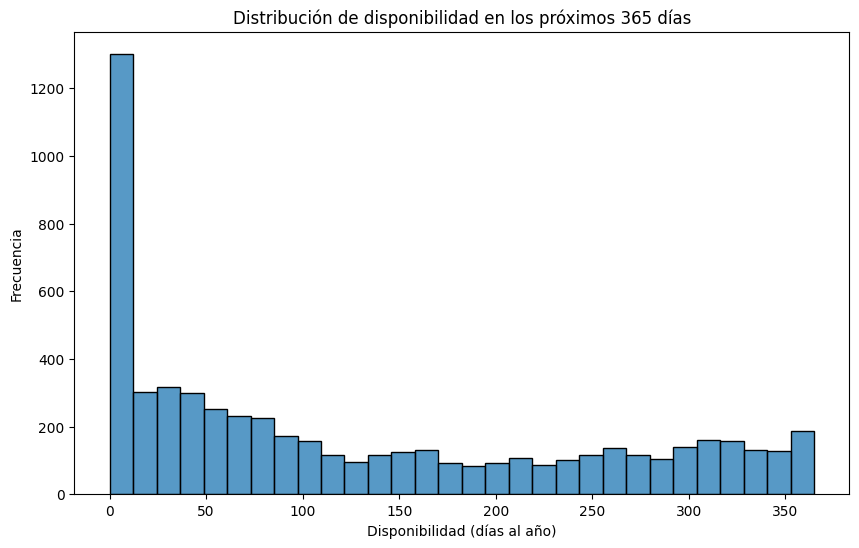

In [24]:
# Histograma de la disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['availability_365'], bins=30, kde=False)
plt.title("Distribución de disponibilidad en los próximos 365 días")
plt.xlabel("Disponibilidad (días al año)")
plt.ylabel("Frecuencia")
plt.show()

Un análisis sorprendente es que la disponibilidad de 365 días para muchas propiedades es de 0 días. Aunque a primera vista esto podría parecer extraño, probablemente se trata de propiedades que alguna vez estuvieron disponibles pero que ya no lo están. Dado que AirBnb ha estado operando desde 2008, es natural que haya publicaciones antiguas que han dejado de estar activas, pero cuyos datos aún permanecen en el sistema, permitiendo su consulta. No obstante, estos alojamientos aun pueden decirnos mucho de los patrones de compra / preferencias de los usuarios de AirBnb en esta ciudad, haciendolos aun fuertemente relevantes para nuestro analisis.

#### **2.1.6. Análisis del atributo "amenities"**

Aunque la variable de disponibilidad (availability_365) proporciona información útil sobre cuántos días una propiedad está disponible, esta no nos da mucha información respecto al potencial de popularidad o rentabilidad de una propiedad, ya que la disponibilidad depende en gran medida de las decisiones del host (por ejemplo, bloqueando fechas o limitando la disponibilidad). Por lo tanto, para identificar las propiedades con mayor potencial de rentabilidad, seleccionaremos una variable que permita obtener más información relevante sobre los servicios y características que hacen a una propiedad más atractiva: la variable "amenities".

La variable "amenities" es una lista que describe los servicios y características que ofrece cada propiedad. Analizar esta variable nos permitirá identificar los servicios más comunes en las propiedades más rentables y aquellos que podrían estar relacionados con precios más altos, como piscinas, jacuzzis, o instalaciones de lujo. Este análisis univariado nos servirá como base para realizar un análisis multivariado posteriormente, donde podremos investigar cómo ciertos "amenities" afectan el precio.

In [25]:
# Dividir la columna 'amenities' en elementos individuales
listings_df['amenities'] = listings_df['amenities'].str.replace("[{}\[\]\"]", "", regex=True)  # Limpiar los caracteres no deseados
amenities_list = listings_df['amenities'].str.split(',')

In [26]:
# Contar la frecuencia de cada amenity
all_amenities = pd.Series([amenity.strip() for sublist in amenities_list for amenity in sublist])
top_amenities = all_amenities.value_counts().head(20)

In [27]:
# Mostrar los amenities más comunes
print("\nTop 20 amenities más comunes:")
print(top_amenities)



Top 20 amenities más comunes:
Smoke alarm              5599
Wifi                     5120
Carbon monoxide alarm    5038
Kitchen                  4996
Hot water                4898
Essentials               4788
Hair dryer               4670
Hangers                  4523
Iron                     4517
Bed linens               4391
Dishes and silverware    4341
Refrigerator             4202
Cooking basics           3984
Microwave                3724
Shampoo                  3486
Hot water kettle         3466
Heating                  3293
Washer                   3285
Self check-in            3249
Fire extinguisher        3108
Name: count, dtype: int64


<ipython-input-28-fe96e3fe9794>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_amenities.values, y=top_amenities.index, palette="Blues_d")


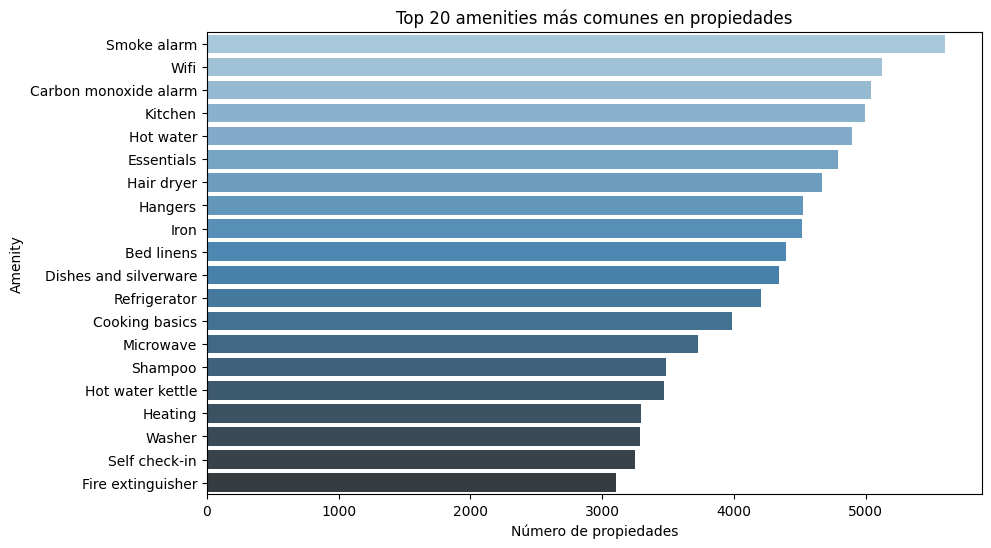

In [28]:
# Graficar los 20 amenities más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_amenities.values, y=top_amenities.index, palette="Blues_d")
plt.title("Top 20 amenities más comunes en propiedades")
plt.xlabel("Número de propiedades")
plt.ylabel("Amenity")
plt.show()

El análisis de los top 20 amenities más comunes revela que los servicios básicos como Wi-Fi, agua caliente, servicios escenciales y cocina son los más ofrecidos en las propiedades de AirBnb en Edimburgo. Estos son servicios esenciales que la mayoría de los huéspedes esperan al reservar una propiedad, lo que explica su amplia disponibilidad, por lo que será escencial que al momento de realizar una inversión para ofrecer un alojamiento, este esté equipado con estos servicios.

 A partir de este análisis, podemos empezar a observar qué amenities son casi indispensables para la mayoría de los alquileres y cuáles podrían ayudar a justificar precios más altos. Posteriormente en nuestro análisis multivariado será evaluar cómo la presencia de ciertas amenidades influye en el precio y la ocupación de las propiedades.

## **3. Estrategia de análisis**

Para identificar la mejor opción de inversión inmobiliaria en AirBnb, se utilizará una combinación de análisis estadísticos y gráficos multivariados. Inicialmente, se calcularán estadísticas descriptivas y correlaciones entre variables clave como precio, disponibilidad y ubicación. Esto permitirá identificar relaciones significativas entre las variables y entender cómo influyen en la rentabilidad. Se usará la correlación de Pearson para medir la relación entre variables continuas como el precio y la disponibilidad. Además, aplicaremos pruebas de hipotesis como el análisis de varianza ANOVA para evaluar si hay diferencias significativas en el precio promedio de las propiedades según diferentes grupos, como el tipo de propiedad (apartamento, habitación privada, etc.) o los vecindarios.

Gráficamente, se emplearán scatterplots y regresiones ajustadas para visualizar la relación entre múltiples atributos, como precio y servicios del alojamiento. También se generarán heatmaps para mostrar la correlación entre todas las variables clave, y pairplots para explorar las relaciones multivariadas de manera más detallada. Esta combinación de análisis estadísticos y gráficos multivariados permitirá una comprensión integral de los factores que afectan la rentabilidad de las propiedades en AirBnb, ayudando a los inversores a tomar decisiones más informadas.

## **3. Desarrollo de la estrategia**

## **3.1. Procesamiento de datos**

Primero, realizarán las transformaciones necesarias para limpiar y preparar los datos para el análisis. Esto incluye la gestión de posibles valores faltantes o anomalos.

En la sección de análisis univariado, se realizaron dos transformaciones importantes para facilitar el análisis:

1.  **Conversión del precio a formato numérico:** El atributo "price" se convirtió a un formato numérico ("price\_float") eliminando caracteres como el símbolo de dólar ($) y las comas.

2.  **Conversión de la lista de amenities a un formato manejable:** La columna "amenities" se transformó de una cadena de texto con formato de lista a una lista de Python, lo que facilita el análisis individual de cada amenity.


A continuación, se realizará un análisis exhaustivo de la calidad de los datos para identificar posibles problemas como valores faltantes, inconsistencias y outliers. Se aplicarán las correcciones necesarias para garantizar la integridad del conjunto de datos.

In [29]:
# Calcular valores faltantes
missing_values = listings_df.isnull().sum()

# Calcular el total de filas (registros)
total_rows = len(listings_df)

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / total_rows) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Valores_Faltantes': missing_values,
                            'Porcentaje_Faltantes': missing_percentage})

# Filtrar solo las columnas con valores faltantes
missing_data = missing_data[missing_data['Valores_Faltantes'] > 0]

print("\nValores faltantes por columna:")
print(missing_data)



Valores faltantes por columna:
                              Valores_Faltantes  Porcentaje_Faltantes
description                                 124              2.145329
neighborhood_overview                      2228             38.546713
host_location                              1071             18.529412
host_about                                 2494             43.148789
host_response_time                          332              5.743945
host_response_rate                          332              5.743945
host_acceptance_rate                        205              3.546713
host_is_superhost                           148              2.560554
host_neighbourhood                         3855             66.695502
neighbourhood                              2228             38.546713
neighbourhood_group_cleansed               5780            100.000000
bathrooms                                   909             15.726644
bathrooms_text                                7           

Se observa que varias columnas presentan un gran numero de valores faltantes, pero dado que nos estamos enforcando en realizar un análisis alrededor de los 5 atributos que consideramos mas imporatante para la extracción de insights, unicamente presentaremos atención a problemas de calidad en estas columans

In [30]:
# Seleccionar las columnas deseadas
columns_to_check = ['neighbourhood_cleansed', 'price_float', 'room_type', 'accommodates', 'amenities']
selected_data = listings_df[columns_to_check]

# Calcular valores faltantes
missing_values = selected_data.isnull().sum()

# Calcular el total de filas (registros)
total_rows = len(selected_data)

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / total_rows) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Valores_Faltantes': missing_values,
                            'Porcentaje_Faltantes': missing_percentage})

# Imprimir los resultados
print("\nValores faltantes por columna:")
print(missing_data)



Valores faltantes por columna:
                        Valores_Faltantes  Porcentaje_Faltantes
neighbourhood_cleansed                  0              0.000000
price_float                           907             15.692042
room_type                               0              0.000000
accommodates                            0              0.000000
amenities                               0              0.000000


La columna 'price' presenta un preocupante 15.7% de datos faltantes, lo cual representa un obstáculo significativo para nuestro análisis. Esta variable es fundamental para determinar los rendimientos potenciales de inversión, ya que nos permite evaluar el valor de mercado de los activos y, por ende, las ganancias que un inversor podría esperar obtener. La ausencia de estos datos limita considerablemente nuestra capacidad para realizar un análisis preciso y confiable de las oportunidades de inversión.

La ausencia de estos datos puede sesgar nuestros resultados, subestimar o sobreestimar la variabilidad de los precios, y limitar nuestra capacidad para identificar patrones y tendencias relevantes. Además, si no se abordan adecuadamente, estos valores faltantes pueden afectar la precisión de nuestros modelos y, en consecuencia, comprometer la calidad de nuestras decisiones basadas en datos.

Existen diversas estrategias para tratar los valores faltantes, cada una con sus propias ventajas y desventajas:

Una primera opción es la eliminación las filas que contienen valores faltantes en la columna "price". Sin embargo, esta estrategia puede resultar en una pérdida significativa de datos, y dada la gran importancia de esta variable para nuestro analisis, elegimos no utilizar esta estrategia.


Una segunda opción consiste en la imputación por la media,  eeemplazando los valores faltantes por el promedio de los valores no faltantes en la columna. Aunque es un método simple, puede subestimar la variabilidad de los datos y no es adecuado si existen valores atípicos. En nuestro caso, no nos hemos encargado de tratar los fuerte valores atípicos que existen en esta columna y que identificamos anteriormente, por lo que tampoco elegimos este metodo.


En este caso, dada la importancia de la variable "price" y los problemas identificados con los metodos anteriormente mencionados, se decidió utilizar un método de imputación más sofisticado: la imputación por K-Nearest Neighbors (KNN). Este método busca los k vecinos más cercanos a cada observación con valores faltantes y utiliza el promedio de los valores de estos vecinos para imputar el valor faltante. KNN es capaz de capturar patrones locales en los datos y puede ser más preciso que los métodos simples de imputación.

In [31]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5)

Es fundamental convertir las variables categóricas como "neighbourhood" y "room_type" a una representación numérica antes de aplicar técnicas como la imputación por KNN. Una forma sencilla de convertir variables categóricas a numéricas es asignando un número único a cada categoría. Esto se conoce como codificación ordinal.

In [32]:
# Convertir las columnas 'neighbourhood_cleansed' y 'room_type' a numéricas
listings_df['neighbourhood_coded'], uniques = pd.factorize(listings_df['neighbourhood_cleansed'])
listings_df['room_type_coded'], uniques = pd.factorize(listings_df['room_type'])

In [33]:
# Seleccionar las columnas deseadas
columns_to_check = ['neighbourhood_coded', 'price_float', 'room_type_coded', 'accommodates']
selected_data = listings_df[columns_to_check]

# Ajustar y transformar los datos
imputed_data = imputer.fit_transform(selected_data)

# Crear un nuevo DataFrame con los datos imputados
imputed_df = pd.DataFrame(imputed_data, columns=selected_data.columns)

In [34]:
# Añade la columa price float de  imputed_df al df original

listings_df['price_float_imputed'] = imputed_df['price_float']


Ahora podemos vovler a analizar la presencia de datos faltantes:

In [35]:
# Seleccionar las columnas deseadas
columns_to_check = ['neighbourhood_cleansed', 'price_float_imputed', 'room_type', 'accommodates', 'amenities']
selected_data = listings_df[columns_to_check]

# Calcular valores faltantes
missing_values = selected_data.isnull().sum()

# Calcular el total de filas (registros)
total_rows = len(selected_data)

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / total_rows) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Valores_Faltantes': missing_values,
                            'Porcentaje_Faltantes': missing_percentage})

# Imprimir los resultados
print("\nValores faltantes por columna:")
print(missing_data)



Valores faltantes por columna:
                        Valores_Faltantes  Porcentaje_Faltantes
neighbourhood_cleansed                  0                   0.0
price_float_imputed                     0                   0.0
room_type                               0                   0.0
accommodates                            0                   0.0
amenities                               0                   0.0


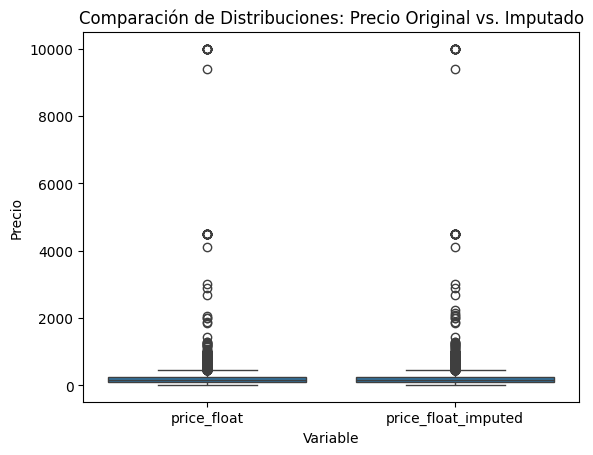

In [36]:
# grafica de forma clara la diferencia en distribucion de price float imputed y price float para claramente apreciar las diferencias ente amboss

# Crear el boxplot
sns.boxplot(x='variable', y='value', data=pd.melt(listings_df, value_vars=['price_float', 'price_float_imputed']))
plt.xlabel('Variable')
plt.ylabel('Precio')
plt.title('Comparación de Distribuciones: Precio Original vs. Imputado')
plt.show()

Como podemos observar en el boxplot, la imputación de datos en la columna 'precio' no ha alterado significativamente la distribución original. Esto sugiere que el método de imputación seleccionado ha sido efectivo. A continuación, procederemos a corregir los valores atípicos para mejorar aún más la calidad de nuestros datos.

Como se pudo observar en el análisis univariado de la variable "price", se identificó un conjunto de datos anómalos. Estos corresponden a propiedades con un precio de 10,000 USD por noche, lo cual es aproximadamente 50 veces mayor al precio promedio de las demás propiedades. La presencia de estos valores atípicos puede distorsionar significativamente el análisis, afectando la media, la desviación estándar y la interpretación de los resultados. Es crucial identificar y manejar estos valores para obtener conclusiones precisas y relevantes.


In [37]:
# Análisis de outliers en precios
q1 = listings_df['price_float_imputed'].quantile(0.25)
q3 = listings_df['price_float_imputed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = listings_df[(listings_df['price_float_imputed'] < lower_bound) | (listings_df['price_float_imputed'] > upper_bound)]
print(f"Outliers detectados en precios: {len(outliers)} propiedades")

Outliers detectados en precios: 408 propiedades


In [38]:
# Calcular el porcentaje de outliers
outlier_percentage = (len(outliers) / len(listings_df)) * 100
print(f"Porcentaje de outliers en precios: {outlier_percentage:.2f}%")

Porcentaje de outliers en precios: 7.06%


In [39]:
# porcentaje de alojamientos con precio mayor a 2k

# Calcular el porcentaje de alojamientos con precio mayor a 2000
precio_mayor_2000 = len(listings_df[listings_df['price_float_imputed'] >=2000])
porcentaje_mayor_2000 = (precio_mayor_2000 / len(listings_df)) * 100

print(f"Porcentaje de alojamientos con precio mayor a 2000/noche: {porcentaje_mayor_2000:.2f}%")


Porcentaje de alojamientos con precio mayor a 2000/noche: 0.69%


Como podemos observar, existe un pequeño nicho de mercado de muy alta gama en Edimburgo, con propiedades que superan los 2000 USD por noche, representando el 0.69% del total de alojamientos. Este mercado, con precios significativamente más altos, podría justificar un análisis diferenciado para entender las características específicas que atraen a este tipo de clientes y las estrategias de inversión más adecuadas.

No obstante, dado que no tenemos información precisa sobre el perfil de los inversores a los que se dirige este estudio, y considerando que este nicho representa un porcentaje muy pequeño del mercado total, no se realizará un análisis particular para este segmento en el presente estudio. En cambio decidió enfocarse en el grueso del mercado y excluir este sector particular de este análisis.


In [40]:
# elimina los alojamientos con precio mayor a 2000
listings_df = listings_df[listings_df['price_float_imputed'] < 2000]

In [41]:
# Análisis de outliers en precios
q1 = listings_df['price_float_imputed'].quantile(0.25)
q3 = listings_df['price_float_imputed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = listings_df[(listings_df['price_float_imputed'] < lower_bound) | (listings_df['price_float_imputed'] > upper_bound)]
print(f"Outliers detectados en precios: {len(outliers)} propiedades")

# Calcular el porcentaje de outliers
outlier_percentage = (len(outliers) / len(listings_df)) * 100
print(f"Porcentaje de outliers en precios: {outlier_percentage:.2f}%")



Outliers detectados en precios: 377 propiedades
Porcentaje de outliers en precios: 6.57%


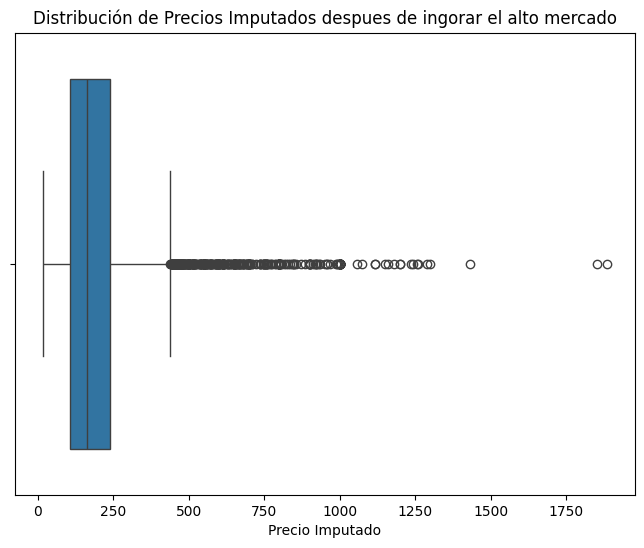

In [42]:
# boxplot de la distribucion de price float imputed

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=listings_df['price_float_imputed'])
plt.xlabel('Precio Imputado')
plt.title('Distribución de Precios Imputados despues de ingorar el alto mercado')
plt.show()


Al no considerar las propiedades con precios superiores a 2000 USD por noche, se ha logrado reducir considerablemente el número de valores atípicos en el conjunto de datos. Si bien se podría realizar una segmentación más granular del mercado, dividiéndolo en un mercado bajo y uno medio, para simplificar el análisis y ampliar su alcance, se ha decidido mantener ambos segmentos juntos. Esto permitirá obtener una visión más general de las oportunidades de inversión en Airbnb en Edimburgo.


En el caso de las variables categóricas como "neighbourhood_cleansed", "amenities" y "room_type", no se realizará un análisis específico de datos anómalos ni nulos. Estas variables se basan en categorías bien definidas y no presentan valores extremos que puedan distorsionar el análisis. A su vez, presentan un 0% de valores nulos o faltantes, y estan separados en categorias claras que no presentan posibles problemas de inconsistencia ni validéz.


En lo que respecta al número de personas por alojamiento, tambien podemos encontrar el numero de outliers dentro de este conjunto de datos:

In [43]:
# Análisis de outliers en accommodates
q1_accommodates = listings_df['accommodates'].quantile(0.25)
q3_accommodates = listings_df['accommodates'].quantile(0.75)
iqr_accommodates = q3_accommodates - q1_accommodates
lower_bound_accommodates = q1_accommodates - 1.5 * iqr_accommodates
upper_bound_accommodates = q3_accommodates + 1.5 * iqr_accommodates

outliers_accommodates = listings_df[(listings_df['accommodates'] < lower_bound_accommodates) | (listings_df['accommodates'] > upper_bound_accommodates)]

print(f"Outliers detectados en accommodates: {len(outliers_accommodates)} propiedades")

# Calcular el porcentaje de outliers
outlier_percentage_accommodates = (len(outliers_accommodates) / len(listings_df)) * 100
print(f"Porcentaje de outliers en accommodates: {outlier_percentage_accommodates:.2f}%")


Outliers detectados en accommodates: 330 propiedades
Porcentaje de outliers en accommodates: 5.75%


Podemos ver que el numero de outliers realmente no es significativo, aunque valdria la pena analizar si nuevamente se tratan en su mayoria de alojamientos extremadamente lujosos que podrían estar alternando nuestros resultados

In [44]:
# Calcula el número de alojamientos con capacidad mayor a 12
num_alojamientos_capacidad_mayor_10 = len(listings_df[listings_df['accommodates'] > 12])

print(f"Número de alojamientos con capacidad mayor a 12: {num_alojamientos_capacidad_mayor_10}")


Número de alojamientos con capacidad mayor a 12: 35


Podemos ver que el numero de alojamientos de este tipo realmente no es muy grande para justificar extraerlos de nuestro analisis y brindarles su propio analisis independiente, por lo que decidimos mantenerlos dentro de nuestro set de datos.

### **3.2 Análisis Descriptivo y Correlaciones**

Primero, se calculará la matriz de correlación entre las variables numéricas. La correlación mide la fuerza y la dirección de la relación lineal entre dos variables. Un valor de correlación cercano a 1 indica una fuerte relación positiva, mientras que un valor cercano a -1 indica una fuerte relación negativa. Un valor cercano a 0 indica que no hay una relación lineal entre las variables.


In [45]:
listings_df[['price_float_imputed', 'accommodates']].corr()

,price_float_imputed,accommodates
price_float_imputed,1.000000,0.622312
accommodates,0.622312,1.000000


La matriz de correlación muestra que existe una correlación positiva moderada entre el precio y la capacidad de alojamiento (0.62), lo que sugiere que las propiedades con mayor capacidad tienden a tener precios más altos. Esto realmente no es un insight muy significativo, pues es algo que ya se sabia de antemano.

Finalmente, se puede utilizar un mapa de calor para visualizar la matriz de correlación. Esto puede ayudar a identificar patrones y relaciones entre las variables de una manera más intuitiva.

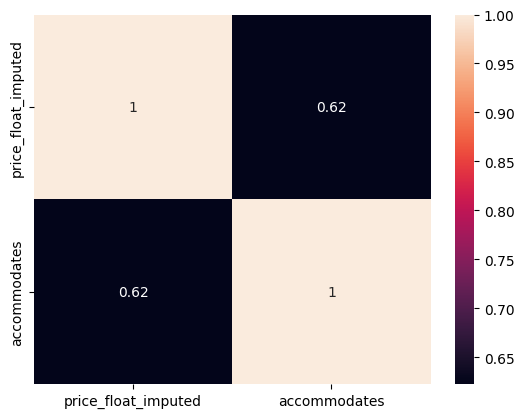

In [46]:
sns.heatmap(listings_df[['price_float_imputed', 'accommodates']].corr(), annot=True)
plt.show()

De igual forma podemos utilizar un pairPlot para visualizar la relación positiva entre el numero de acomodantes y el precio promedio por noche

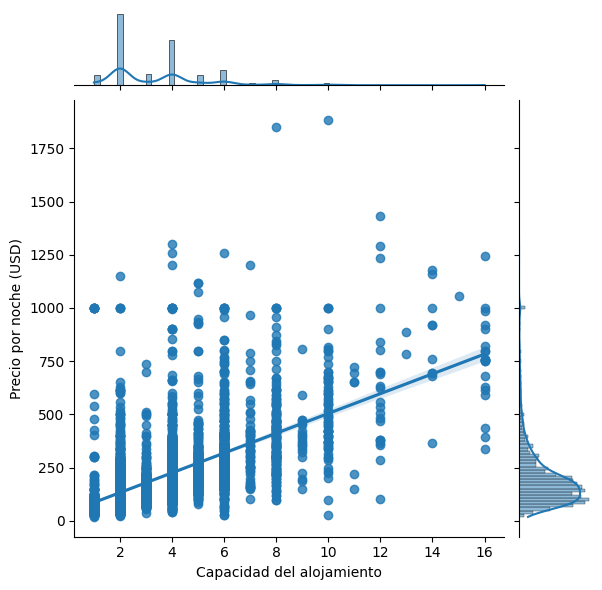

In [47]:
# Crear el gráfico de dispersión con regresión lineal
sns.jointplot(x='accommodates', y='price_float_imputed', data=listings_df, kind='reg')

# Agregar títulos a los ejes
plt.xlabel('Capacidad del alojamiento')
plt.ylabel('Precio por noche (USD)')

# Mostrar el gráfico
plt.show()


Las variables categóricas como "neighbourhood" y "room_type" no se incluyen en el análisis de correlación de Pearson porque este método se utiliza para medir la relación lineal entre variables numéricas. Las variables categóricas representan categorías o grupos, y no tienen un orden o una escala numérica inherente. Por lo tanto, no es posible calcular la correlación de Pearson entre una variable numérica y una variable categórica. En su lugar, se deben utilizar otras técnicas, como el análisis de varianza (ANOVA) o la prueba de chi-cuadrado, para evaluar la relación entre variables categóricas y numéricas.


Antes de realizar la prueba ANOVA, necesitamos agrupar los datos por neighbourhood_cleansed y extraer los precios para cada vecindario. Esto se puede hacer fácilmente usando groupby.

In [48]:
# Agrupar los datos por vecindario y obtener los precios
grouped_data = listings_df.groupby('neighbourhood_cleansed')['price_float_imputed'].apply(list)

# Ver los datos agrupados (solo para verificar)
grouped_data.head()

# Realizar la prueba ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Imprimir los resultados
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')


F-statistic: 5.335301754011273, p-value: 4.441546921819322e-62


* F-statistic (5.34): Este valor indica la proporción entre la variabilidad entre los grupos (en este caso, los precios de los diferentes vecindarios) y la variabilidad dentro de los grupos. Un valor de F relativamente alto, como este, sugiere que hay una diferencia notable en las medias de los precios entre los distintos vecindarios.

* p-value (4.44e-62): El valor p es extremadamente bajo, mucho menor que el umbral convencional de 0.05. Este resultado nos permite rechazar la hipótesis nula, que afirma que no hay diferencias significativas entre los precios de los vecindarios. En otras palabras, hay una evidencia estadística muy fuerte que indica que al menos uno de los vecindarios tiene precios significativamente diferentes de los demás.


Estos resultados sugieren que hay diferencias estadísticamente significativas en los precios entre los vecindarios en tu conjunto de datos. Esto podría indicar que los precios en ciertas áreas son considerablemente más altos o más bajos que en otras, lo cual puede estar relacionado con factores como la ubicación, las características de las propiedades, la demanda, o el nivel socioeconómico de los barrios.

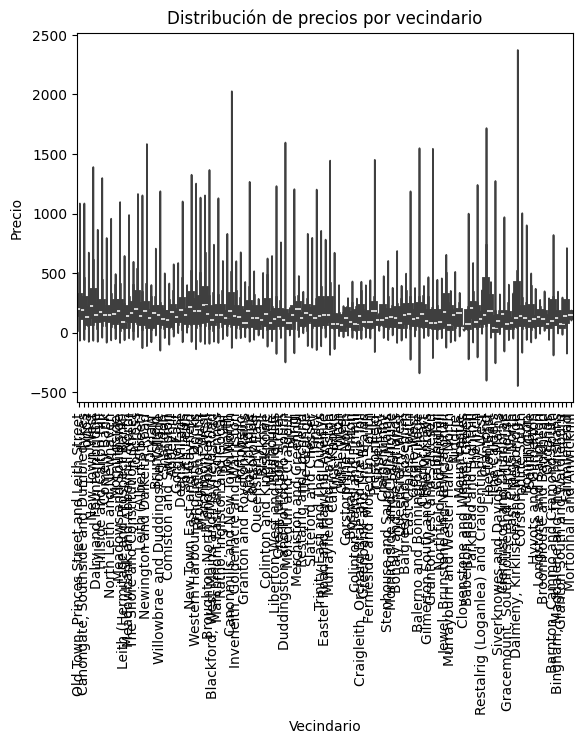

In [49]:
# visualización con gráfico de violín
sns.violinplot(x='neighbourhood_cleansed', y='price_float_imputed', data=listings_df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.show()

Dado que el gráfico de violín, a pesar de ser atractivo visualmente, puede resultar complejo para comparar rápidamente un gran número de vecindarios, sugerimos concentrarnos en los 7 vecindarios con mayor rentabilidad promedio. Al limitar la visualización a estos pocos, obtendremos una representación más clara y fácil de interpretar. Podemos utilizar un gráfico de barras para mostrar de manera sencilla el precio promedio de cada uno de estos 7 vecindarios. Esto nos permitirá realizar una comparación rápida y efectiva, identificando claramente cuál es el vecindario más rentable y cuáles le siguen en el ranking.

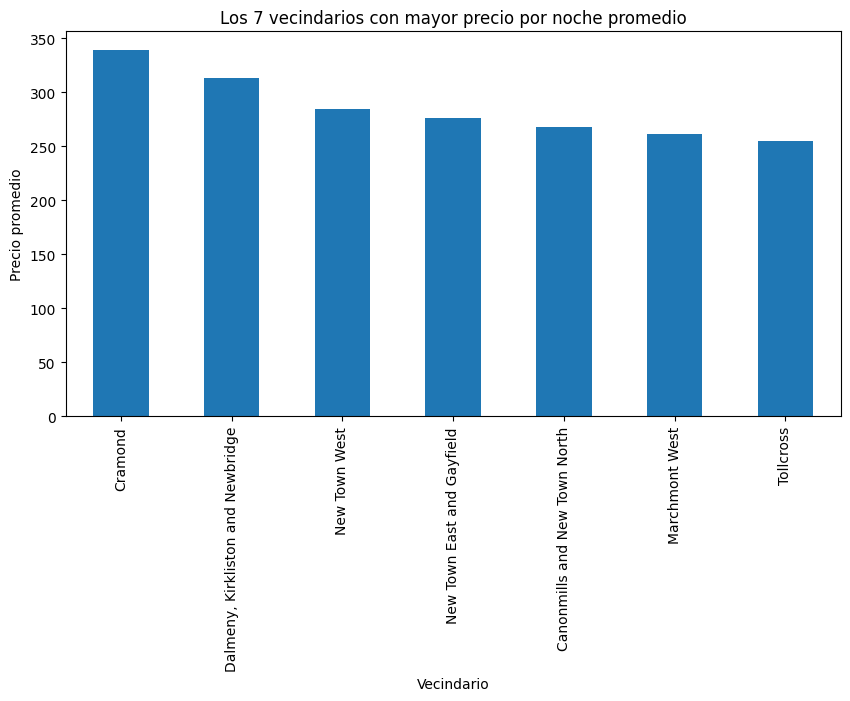

In [50]:
import matplotlib.pyplot as plt

top_5_vecindarios = listings_df.groupby('neighbourhood_cleansed')['price_float_imputed'].mean().sort_values(ascending=False).head(7)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_5_vecindarios.plot(kind='bar')
plt.title('Los 7 vecindarios con mayor precio por noche promedio')
plt.xlabel('Vecindario')
plt.ylabel('Precio promedio')
plt.show()

Los vecindarios destacados en el gráfico incluyen:

  * Cramond: Con el precio promedio más alto (~345 USD/noche), lo que lo convierte en una excelente opción para inversores.
  * Dalmeny, Kirkliston and Newbridge
  * New Town West
  * New Town East and Gayfield
  * Canonmills and New Town North
  * Marchmont West
  * Tollcross

Invertir en propiedades en estos vecindarios podría ser particularmente lucrativo si se busca captar el mercado de alojamientos, donde la alta demanda y los precios pueden generar altos ingresos por noche.


Ahora podemos pasar a analizar la correlación entre el tipo de alojamiento y el precio por noche del mismo

En lugar de agrupar por neighbourhood_cleansed, ahora agrupamos los precios según el tipo de habitación (room_type).

In [51]:
# Agrupar los datos por tipo de habitación y obtener los precios
grouped_data_room = listings_df.groupby('room_type')['price_float_imputed'].apply(list)

# Ver los datos agrupados (para verificar)
grouped_data_room.head()

# Realizar la prueba ANOVA para los tipos de habitación
anova_result_room = stats.f_oneway(*grouped_data_room)

# Imprimir los resultados
print(f'F-statistic: {anova_result_room.statistic}, p-value: {anova_result_room.pvalue}')



F-statistic: 406.14038441902494, p-value: 3.0898271698151366e-239


* F-statistic: 406.14: Este valor de la estadística F es bastante alto, lo que indica que hay una gran diferencia en las medias de los precios (price_float_imputed) entre los diferentes tipos de habitación. La estadística F compara la varianza entre los grupos con la varianza dentro de los grupos, y un valor elevado sugiere que las diferencias entre los tipos de habitación son mucho más significativas que las variaciones dentro de cada tipo.

* p-value: 3.09e-239: El valor p es extremadamente bajo (casi 0), mucho menor que el umbral común de 0.05. Esto significa que podemos rechazar la hipótesis nula con un altísimo nivel de confianza. En otras palabras, es casi seguro que los precios son significativamente diferentes entre al menos uno de los tipos de habitación.

<Figure size 800x600 with 0 Axes>

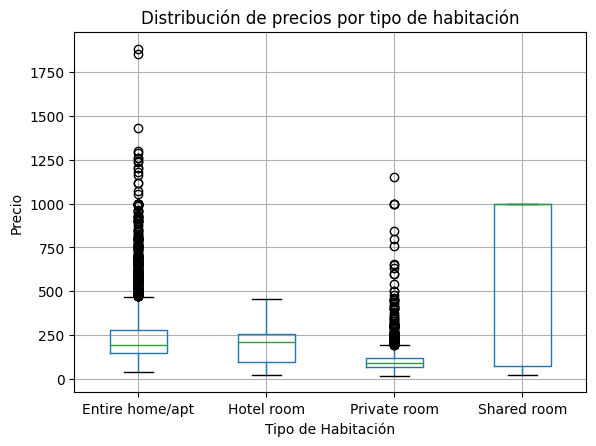

In [52]:
# Crear un gráfico de caja para visualizar las distribuciones de precios por tipo de habitación
plt.figure(figsize=(8,6))
listings_df.boxplot(column='price_float_imputed', by='room_type', rot=0)
plt.title('Distribución de precios por tipo de habitación')
plt.suptitle('')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()


Como podemos ver, los alojamientos de tipo casa o apartamento son claramente los que dominan el mercado, y podemos hacer esta afirmación con un alto nivel de confianza.

En segundo lugar estan los cuartos privados, pero en promedio su precio es casi la mitad a la de las casas y apartamentos, haciendolos una decisión inferior para un inversionista.

Por ultimo, Para realizar el análisis ANOVA con la variable amenities, que es una lista de servicios en cada habitación, debemos hacer algunas transformaciones adicionales. No podemos trabajar directamente con listas de valores como con room_type o neighbourhood_cleansed, así que necesitamos convertir las listas de amenities en variables categóricas o dummies que podamos usar en el análisis ANOVA.

Primero transformaremos las listas de amenities en variables binarias (0 o 1) usando pd.get_dummies() o el método str.get_dummies() de pandas, que crea una columna para cada amenidad.

In [53]:
# Ver un ejemplo de la columna 'amenities' que contiene listas
listings_df['amenities'].head()

# Convertir las listas de amenities en variables binarias
# Eliminar los caracteres especiales como '{', '}', ' ' para separar las amenities
listings_df['amenities'] = listings_df['amenities'].str.replace('[{}"] ', '')
listings_df['amenities'] = listings_df['amenities'].str.replace(' ,', ',')
listings_df['amenities'] = listings_df['amenities'].str.strip()

# Crear variables dummy para las amenities
amenities_dummies = listings_df['amenities'].str.get_dummies(sep=', ')

# Ver las primeras filas del nuevo dataframe de amenities
amenities_dummies.head()


Bell refrigerator   Bose Bluetooth sound system   Dove body soap  \
0                   0                             0                0   
1                   0                             0                0   
2                   0                             0                0   
3                   0                             0                0   
4                   0                             0                0   

    Large Samsung refrigerator   Neils Yard Remedies body soap  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

    Various conditioner  'Simple' -  sensitive skin experts shampoo  \
0                     0                                           0   
1                     0                                           0   
2                     0                                           0   
3                     0                                           0   
4                     0                                           0   

   1 day a week - available at extra cost  100 inch HDTV with Chromecast  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   

   120 inch TV with Disney+  13 inch HDTV  14 inch HDTV with standard cable  \
0                         0             0                                 0   
1                         0             0                                 0   
2                         0             0                                 0   
3                         0             0                                 0   
4                         0             0                                 0   

   15 inch TV with standard cable  16 inch TV  18 inch TV  \
0                               0           0           0   
1                               0           0           0   
2                               0           0           0   
3                               0           0           0   
4                               0           0           0   

   18 inch TV with Amazon Prime Video  19 inch HDTV  \
0                                   0             0   
1                                   0             0   
2                                   0             0   
3                                   0             0   
4                                   0             0   

   19 inch HDTV with standard cable  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   2 x Shared in Kitchen for chilling suite drinks refrigerator  \
0                                                             0   
1                                                             0   
2                                                             0   
3                                                             0   
4                                                             0   

   2-5 years old  20 inch HDTV with Netflix  20 inch TV  \
0              0                          0           0   
1              0                          0           0   
2              0                          0           0   
3              0                          0           0   
4              0                          0           0   

   21 inch HDTV with Netflix  22 inch HDTV  22 inch TV  \
0                          0             0           0   
1       

Ahora que tenemos las amenidades como variables binarias (0 o 1), podemos realizar una prueba ANOVA para comparar los precios entre las habitaciones que tienen una determinada amenidad y las que no la tienen. Realizaremos una ANOVA para cada una de las amenidades seleccionadas.

Filtramos de una vez los que tengan un p-value menor a 0.05, dado que estos son los que realmente rechazan la hipotesis nula y son las amenicades sobre las cuales podemos decir tienen una relacion con el precio por noche del alojamiento.

In [54]:
df_selected_amenities = listings_df.join(amenities_dummies)

for amenity in amenities_dummies:
    # Agrupar los precios por la presencia (1) o ausencia (0) de la amenidad
    grouped_data_amenity = df_selected_amenities.groupby(amenity)['price_float_imputed'].apply(list)

    # Realizar la prueba ANOVA para la amenidad
    anova_result_amenity = stats.f_oneway(*grouped_data_amenity)

    # Imprimir los resultados para cada amenidad

    if anova_result_amenity.pvalue < 0.05:
        print(f"Amenidad: {amenity}")
        print(f'F-statistic: {anova_result_amenity.statistic}, p-value: {anova_result_amenity.pvalue}\n')


Amenidad:  Large Samsung refrigerator
F-statistic: 4.654897011847111, p-value: 0.031006468155323298

Amenidad: 2-5 years old
F-statistic: 6.219860138768308, p-value: 0.01266044071155494

Amenidad: 40 inch HDTV with Disney+
F-statistic: 7.796826852729394, p-value: 0.005251132173094964

Amenidad: 48 inch HDTV with Amazon Prime Video
F-statistic: 4.705825916862421, p-value: 0.030101478176491427

Amenidad: 50 inch HDTV with Netflix
F-statistic: 4.801513489579735, p-value: 0.02847481460009894

Amenidad: 55 inch TV with Netflix
F-statistic: 10.83164012467414, p-value: 0.0010038309526247116

Amenidad: 58 inch HDTV with premium cable
F-statistic: 14.151186516033082, p-value: 0.00017037154762765316

Amenidad: 75 inch HDTV with Netflix
F-statistic: 9.959201763376754, p-value: 0.0016087544100796085

Amenidad: AEG stainless steel induction stove
F-statistic: 21.776568562381673, p-value: 3.1327970638491284e-06

Amenidad: Aga Marvel gas stove
F-statistic: 21.16096680892185, p-value: 4.31356332360007

Para facilitar el analisis de todas estas amenidades que rechazan la hipotesis nula, lo mejor será rankearlas en un grafico de acuerdo a su F-statistic.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista para almacenar los resultados del ANOVA
anova_results = []

# Iterar sobre todas las amenidades
for amenity in amenities_dummies.columns:
    # Agrupar los precios por la presencia (1) o ausencia (0) de la amenidad
    grouped_data_amenity = df_selected_amenities.groupby(amenity)['price_float_imputed'].apply(list)

    # Realizar la prueba ANOVA
    anova_result_amenity = stats.f_oneway(*grouped_data_amenity)

    # Almacenar el resultado solo si es significativo (p < 0.05)
    if anova_result_amenity.pvalue < 0.05:
        anova_results.append({
            'Amenity': amenity,
            'F-statistic': anova_result_amenity.statistic,
            'p-value': anova_result_amenity.pvalue
        })

# Convertir los resultados a un DataFrame para facilitar la manipulación
anova_df = pd.DataFrame(anova_results)

# Ordenar por F-statistic en orden descendente y seleccionar las 10 principales
top_10_anova = anova_df.sort_values(by='F-statistic', ascending=False).head(10)

# Mostrar los resultados
print(top_10_anova)


                  Amenity  F-statistic       p-value
104  Lock on bedroom door   344.260385  1.112676e-74
92                Kitchen   243.297607  9.420352e-54
51             Dishwasher   238.581751  9.138612e-53
131            Pool table   154.037506  6.358571e-35
73    Free street parking   136.541786  3.418802e-31
82             High chair   104.906365  2.075010e-24
52                  Dryer    96.874700  1.115857e-22
46                   Crib    93.500429  5.967393e-22
166                    TV    89.361390  4.676728e-21
24              Breakfast    69.724951  8.462577e-17


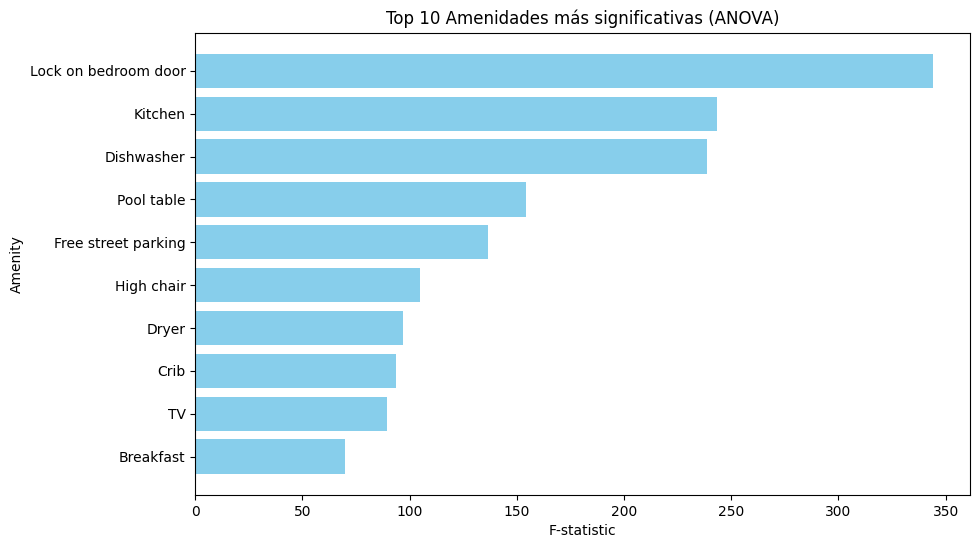

In [56]:
# Crear un gráfico de barras con las 10 amenidades más significativas
plt.figure(figsize=(10,6))
plt.barh(top_10_anova['Amenity'], top_10_anova['F-statistic'], color='skyblue')
plt.xlabel('F-statistic')
plt.ylabel('Amenity')
plt.title('Top 10 Amenidades más significativas (ANOVA)')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las más altas aparezcan arriba
plt.show()


Las amenidades con un valor F alto indican que existe una diferencia significativa en los precios entre las propiedades que tienen esa amenidad y las que no la tienen. Un valor de F mayor sugiere una mayor variabilidad explicada por la amenidad en cuestión.

Aunque servicios esenciales como el WiFi y el baño son comunes y prácticamente obligatorios en la mayoría de los alojamientos de Airbnb como vimos anteriormente, este análisis nos permite identificar qué servicios adicionales realmente influyen en el precio de un alojamiento. Las amenidades que aparecen en este análisis, como cerradura en la puerta del dormitorio, cocina, lavavajillas y mesa de billar, no solo son valoradas por los huéspedes, sino que también representan oportunidades claras para aumentar el valor percibido de un alojamiento.

Para un inversionista que busca maximizar los ingresos de sus propiedades, estas amenidades identificadas en el análisis deberían ser prioridades a la hora de decidir qué servicios ofrecer. Incluir servicios como una cocina equipada, estacionamiento gratuito en la calle, o incluso comodidades como un Televisor y mesa de pool. Por lo tanto, agregar estas amenidades estratégicamente puede potenciar el precio de un alojamiento en Airbnb, permitiendo al inversionista obtener un mayor retorno sobre su inversión

### **3.3. Insights extraídos**

Las conclusiones del análisis revelan varias oportunidades valiosas para inversores en el mercado de alojamientos:

1. Precios por Vecindario: Existen diferencias significativas en los precios de los alojamientos entre distintos vecindarios. Los vecindarios con precios promedio altos, como Cramond, Dalmeny, Kirkliston y Newbridge presentan oportunidades lucrativas para inversiones, dado que estos lugares pueden generar mayores ingresos por noche. Concentrarse en las áreas con la mayor rentabilidad promedio puede maximizar el retorno de la inversión en propiedades. Estas zonas tienen en promedio precios por noche por encima de los 300 USD, valor que sobrepasa completamente el precio promedio por noche en alojamiento de edimburgo de 150 USD.


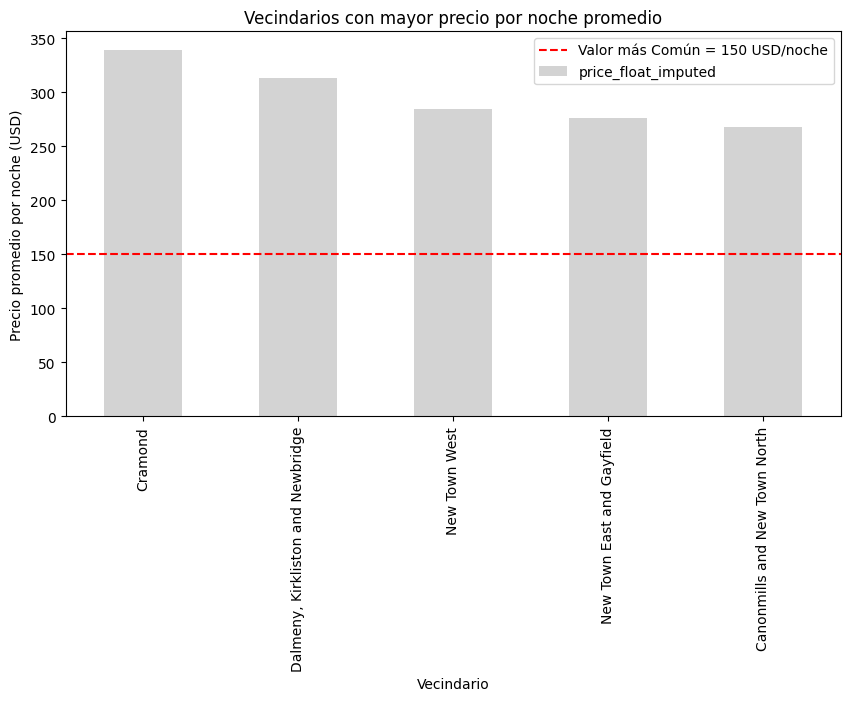

In [73]:
top_5_vecindarios = listings_df.groupby('neighbourhood_cleansed')['price_float_imputed'].mean().sort_values(ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = top_5_vecindarios.plot(kind='bar', color='lightgrey')

# Añadir línea horizontal en 150
plt.axhline(y=150, color='red', linestyle='--', label='Valor más Común = 150 USD/noche')

# Añadir título y etiquetas
plt.title('Vecindarios con mayor precio por noche promedio')
plt.xlabel('Vecindario')
plt.ylabel('Precio promedio por noche (USD)')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()


<ipython-input-77-46a557a8d1ac>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='neighbourhood_cleansed', y='price_float_imputed', data=top_5_data, palette='Blues')


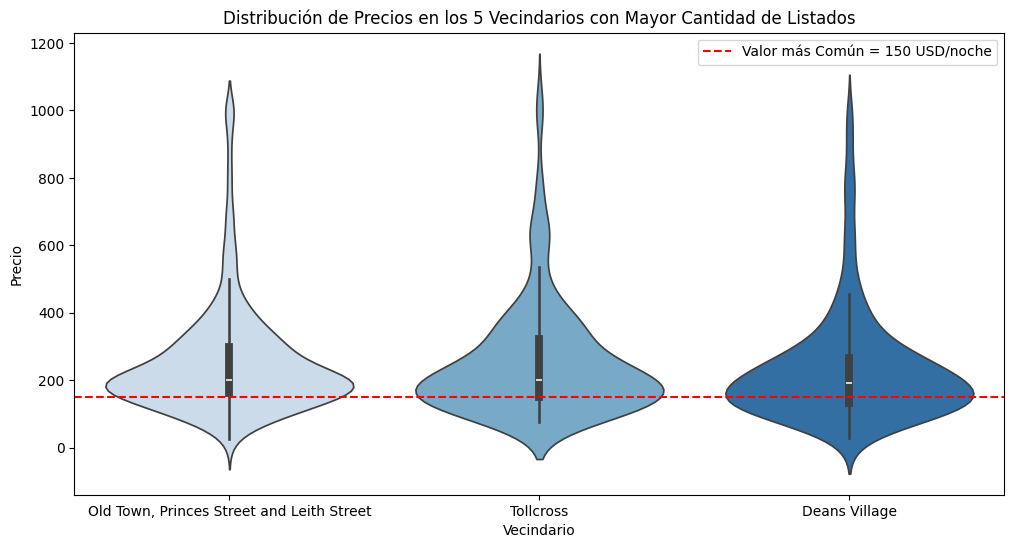

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assumed 'listings_df' is already defined
top_5_vecindarios = listings_df['neighbourhood_cleansed'].value_counts().index[:3]

# Filter data for top 5 neighborhoods
top_5_data = listings_df[listings_df['neighbourhood_cleansed'].isin(top_5_vecindarios)]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_cleansed', y='price_float_imputed', data=top_5_data, palette='Blues')

# Add a horizontal line at 150
plt.axhline(y=150, color='red', linestyle='--', label='Valor más Común = 150 USD/noche')

# Add title and labels
plt.title('Distribución de Precios en los 5 Vecindarios con Mayor Cantidad de Listados')
plt.xlabel('Vecindario')
plt.ylabel('Precio')

# Show legend
plt.legend()

# Show plot
plt.show()


2. Tipo de Alojamiento: Los alojamientos tipo casa o apartamento tienen precios significativamente más altos en comparación con los cuartos privados. Esto sugiere que las propiedades con más espacio, privacidad y capacidad, como casas y apartamentos, son preferidas y pueden ofrecer mayores beneficios económicos. Invertir en estos tipos de alojamientos es más rentable que en cuartos privados.


<Figure size 1000x600 with 0 Axes>

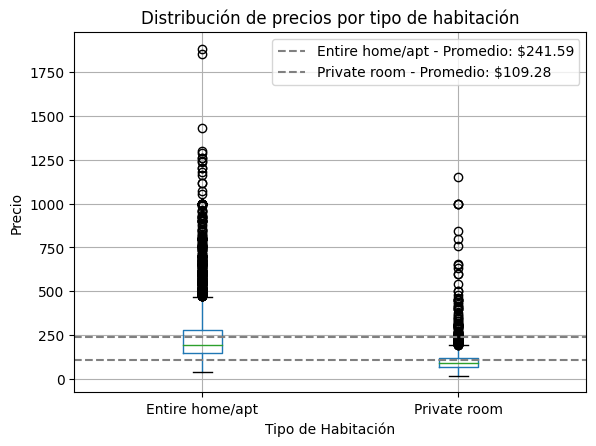

In [58]:
# Filtrar el DataFrame para excluir "Hotel room" y "Shared room"
filtered_df = listings_df[~listings_df['room_type'].isin(['Hotel room', 'Shared room'])]

# Calcular el promedio de precios para cada tipo de habitación restante
mean_prices = filtered_df.groupby('room_type')['price_float_imputed'].mean()

# Crear el gráfico de caja para visualizar las distribuciones de precios por tipo de habitación
plt.figure(figsize=(10, 6))
ax = filtered_df.boxplot(column='price_float_imputed', by='room_type', rot=0)

# Añadir líneas horizontales para mostrar los promedios
for room_type, mean_price in mean_prices.items():
    plt.axhline(y=mean_price, color='grey', linestyle='--', label=f'{room_type} - Promedio: ${mean_price:.2f}')

# Añadir título y etiquetas
plt.title('Distribución de precios por tipo de habitación')
plt.suptitle('')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()


3. Influencia de Amenidades: La presencia de ciertas amenidades puede aumentar significativamente el precio de un alojamiento. Entre las amenidades más influyentes se encuentran la cocina, el lavavajillas, y lujos como TV y mesa de billar. Estas características, junto con otras como el estacionamiento gratuito y diferentes electronicos del hogar, son valoradas por los huéspedes y pueden justificar precios más altos. Invertir en propiedades que incluyan estas amenidades puede incrementar el valor percibido y el retorno económico.

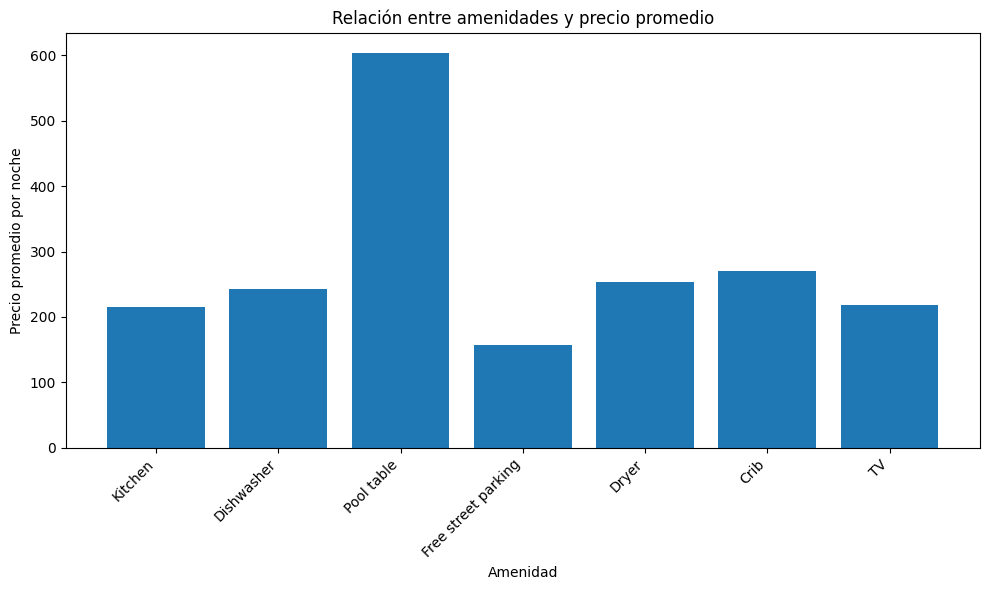

In [60]:
amenities = ['Kitchen', 'Dishwasher', 'Pool table',
             'Free street parking', 'Dryer', 'Crib', 'TV']

# Calcula el precio promedio para cada amenidad
amenity_prices = []
for amenity in amenities:
  price = listings_df[listings_df['amenities'].str.contains(amenity)]['price_float_imputed'].mean()
  amenity_prices.append(price)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(amenities, amenity_prices)
plt.xlabel('Amenidad')
plt.ylabel('Precio promedio por noche')
plt.title('Relación entre amenidades y precio promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En resumen, para maximizar la rentabilidad, los inversores deben considerar propiedades en vecindarios de alta rentabilidad, enfocarse en tipos de alojamiento más costosos como casas y apartamentos, y equipar las propiedades con amenidades que se han demostrado influyentes en el aumento de precios.